# Cliff Walking Problem solved with TD(0) Algorithms: Implementations & Comparisons

## 1. Load Libraries & Define Environment

In [1]:
import gym
import random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import OrderedDict

The **OpenAI Gym toolkit** includes the below environment for the **"Cliff-Walking"** problem:

In [2]:
print('OpenAI Gym environments for Cliff Walking Problem:')
[k for k in gym.envs.registry.env_specs.keys() if k.find('Cliff' , 0) >=0]

OpenAI Gym environments for Cliff Walking Problem:


['CliffWalking-v0']

Load the **Cliff-Walking** environment:

In [3]:
env = gym.make('CliffWalking-v0')

This environment has to do about gridworld shown below, where the traveller initial position (**`x`**) and the target to achieve (reach **`T`**) has been flagged appropriately. In addition in a one of the edge of this gridwordld example there is a "Cliff" denoted with **`C`**. Reward is $-1$ on all transitions except those into the cliff region. Steppping into this region incurs a reward of $-100$ and sends the agent instantly back to the start. 

Once the environment is initialized you get the situation below. This is an episodic (undiscounted) task with start at traveller's starting point, and it is completed either when the goal is achieved, that is the traveller manage to reach the target location, **`T`**, or she may happen to step into the cliff. In this case the environment is reseted in each initial state.

In [4]:
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



Possible *traveller's actions* are of course her movements in this grid:
- **up:**
- **down:**
- **left:**
- **right:**

To get the *new state* at *every next step of an episode*, you may pass the current action into the `.step()` method of the environment. The environment then will return a tuple **(observation, reward, done, info)** each of which are explained as below:
- **observation (object):** agent's observation of the current environment
- **reward (float):** amount of reward returned after previous action
- **done (bool):** whether the episode has ended, in which case further step() calls will return undefined results
- **info (dict):** contains auxiliary diagnostic information (helpful for debugging, and sometimes learning)

***Note:*** *At termination of each episode, the programmer is responsible to reset the environment.*

For further details concerning the `CliffWalking-v0` environment of **OpenAI Gym toolkit** consult the docstring below.

In [5]:
help(env)

Help on CliffWalkingEnv in module gym.envs.toy_text.cliffwalking object:

class CliffWalkingEnv(gym.envs.toy_text.discrete.DiscreteEnv)
 |  This is a simple implementation of the Gridworld Cliff
 |  reinforcement learning task.
 |  
 |  Adapted from Example 6.6 (page 106) from Reinforcement Learning: An Introduction
 |  by Sutton and Barto:
 |  http://incompleteideas.net/book/bookdraft2018jan1.pdf
 |  
 |  With inspiration from:
 |  https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py
 |  
 |  The board is a 4x12 matrix, with (using NumPy matrix indexing):
 |      [3, 0] as the start at bottom-left
 |      [3, 11] as the goal at bottom-right
 |      [3, 1..10] as the cliff at bottom-center
 |  
 |  Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward
 |  and a reset to the start. An episode terminates when the agent reaches the goal.
 |  
 |  Method resolution order:
 |      CliffWalkingEnv
 |      gym.envs.toy_text.discr

## 2. RL-Algorithms based on Temporal Difference TD(0)

### 2a. Load the "Temporal Difference" Python class

Load the Python class `PlotUtils()` which provides various plotting utilities and start a new instance.

In [88]:
%run ./PlotUtils.py

In [89]:
plotutls = PlotUtils()

Load the **Temporal Difference Python class**, `TemporalDifferenceUtils()`:

In [90]:
%run ./TD0_Utils.py 

Instantiate the class for the environment of interest:

In [91]:
TD0 = TemporalDifferenceUtils(env)

### 2b. SARSA: On-Policy TD(0) Control

In [37]:
from tqdm import tqdm

In [92]:
# Define Number of Episodes
n_episodes = 1000

# e-greedy parameters to investigate
print('Determine the epsilon parameters for the epsilon-greedy policy...\n')
epsilons = np.array([0.1, 0.13, 0.16])
print('epsilons: '.format(epsilons), '\n')

# various step-sizes (alpha) to try
print('Determine the step-sizes parameters (alphas) for the TD(0)...\n')
step_sizes = np.array([0.4])
print('step_sizes: {}'.format(step_sizes), '\n')

# Fixed discount
discount_fixed = 1

# Create a mesh-grid of trials
print('Create a dictionary of the RL-models of interest...\n')
epsilons, step_sizes = np.meshgrid(epsilons, step_sizes)
epsilons = epsilons.flatten()
step_sizes = step_sizes.flatten()

# Create a dictionary of the RL-trials of interest
RL_trials = {"baseline":
             {'epsilon': 0.1,
              'step_size': 0.5, 'discount': 1}}

for n, trial in enumerate(list(zip(epsilons, step_sizes))):
    key = 'trial_' + str(n+1)
    RL_trials[key] = {'epsilon': trial[0], 
                      'step_size': trial[1], 'discount': discount_fixed}
print('Number of RL-models to try: {}\n'.format(len(RL_trials)))

print('Let all RL-models to be trained for {0:,} episodes...\n'.format(int(n_episodes)))

rewards_per_trial_SARSA = OrderedDict((label, np.array([])) for label, _ in RL_trials.items())
q_values_per_trial_SARSA = OrderedDict((label, np.array([])) for label, _ in RL_trials.items())

for trial, params_dict in RL_trials.items():
    
    # Read out parameters from "params_dict"
    epsilon = params_dict['epsilon']
    step_size = params_dict['step_size']
    discount = params_dict['discount']
    
    # Apply SARSA [on-policy TD(0) Control]
    q_values, tot_rewards = TD0.sarsa_on_policy_control(env, 
                                                        n_episodes=n_episodes, 
                                                        step_size=step_size, discount=discount, epsilon=epsilon)
    
    # Update "rewards_per_trial" and "q_values_per_trial" OrderedDicts
    rewards_per_trial_SARSA[trial] = tot_rewards
    q_values_per_trial_SARSA[trial] = q_values

Determine the epsilon parameters for the epsilon-greedy policy...

epsilons:  

Determine the step-sizes parameters (alphas) for the TD(0)...

step_sizes: [0.4] 

Create a dictionary of the RL-models of interest...

Number of RL-models to try: 4

Let all RL-models to be trained for 1,000 episodes...



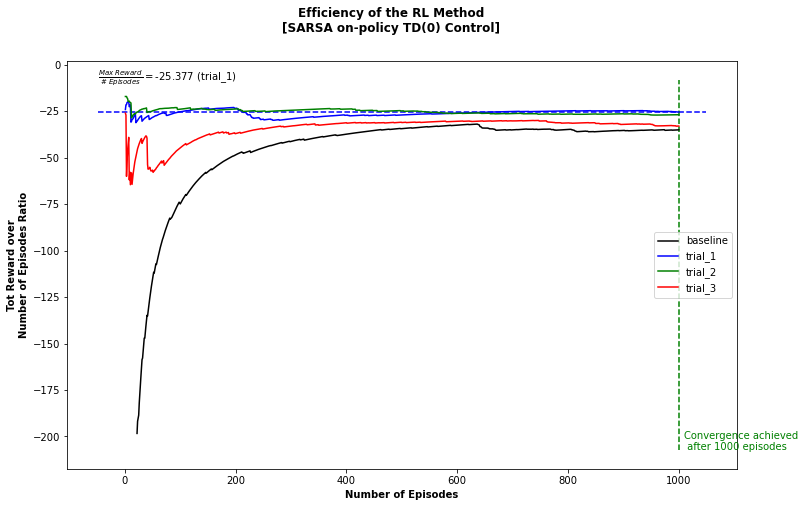

In [95]:
title = 'Efficiency of the RL Method\n[SARSA on-policy TD(0) Control]'
plotutls.plot_learning_curve(rewards_per_trial_SARSA, title=title, lower_reward_ratio=-200)

In [40]:
RL_trials

{'baseline': {'epsilon': 0.1, 'step_size': 0.5, 'discount': 1},
 'trial_1': {'epsilon': 0.1, 'step_size': 0.4, 'discount': 1},
 'trial_2': {'epsilon': 0.13, 'step_size': 0.4, 'discount': 1},
 'trial_3': {'epsilon': 0.16, 'step_size': 0.4, 'discount': 1}}

### 2c. Q-Learning: Off-Policy TD(0) Control

In [107]:
# Define Number of Episodes
n_episodes = 1000

# e-greedy parameters to investigate
print('Determine the epsilon parameters for the epsilon-greedy policy...\n')
epsilons = np.array([0.1, 0.13, 0.16])
print('epsilons: '.format(epsilons), '\n')

# various step-sizes (alpha) to try
print('Determine the step-sizes parameters (alphas) for the TD(0)...\n')
step_sizes = np.array([0.4])
print('step_sizes: {}'.format(step_sizes), '\n')

# Fixed discount
discount_fixed = 1

# Create a mesh-grid of trials
print('Create a dictionary of the RL-models of interest...\n')
epsilons, step_sizes = np.meshgrid(epsilons, step_sizes)
epsilons = epsilons.flatten()
step_sizes = step_sizes.flatten()

# Create a dictionary of the RL-trials of interest
RL_trials = {"baseline":
             {'epsilon': 0.1,
              'step_size': 0.5, 'discount': 1}}

for n, trial in enumerate(list(zip(epsilons, step_sizes))):
    key = 'trial_' + str(n+1)
    RL_trials[key] = {'epsilon': trial[0], 
                      'step_size': trial[1], 'discount': discount_fixed}
print('Number of RL-models to try: {}\n'.format(len(RL_trials)))

print('Let all RL-models to be trained for {0:,} episodes...\n'.format(int(n_episodes)))

rewards_per_trial_QL = OrderedDict((label, np.array([])) for label, _ in RL_trials.items())
q_values_per_trial_QL = OrderedDict((label, np.array([])) for label, _ in RL_trials.items())

for trial, params_dict in RL_trials.items():
    
    # Read out parameters from "params_dict"
    epsilon = params_dict['epsilon']
    step_size = params_dict['step_size']
    discount = params_dict['discount']
    
    # Apply SARSA [on-policy TD(0) Control]
    q_values, tot_rewards = TD0.q_learning_off_policy(env, 
                                                      n_episodes=n_episodes, 
                                                      step_size=step_size, discount=discount, epsilon=epsilon)
    
    # Update "rewards_per_trial" and "q_values_per_trial" OrderedDicts
    rewards_per_trial_QL[trial] = tot_rewards
    q_values_per_trial_QL[trial] = q_values

Determine the epsilon parameters for the epsilon-greedy policy...

epsilons:  

Determine the step-sizes parameters (alphas) for the TD(0)...

step_sizes: [0.4] 

Create a dictionary of the RL-models of interest...

Number of RL-models to try: 4

Let all RL-models to be trained for 1,000 episodes...



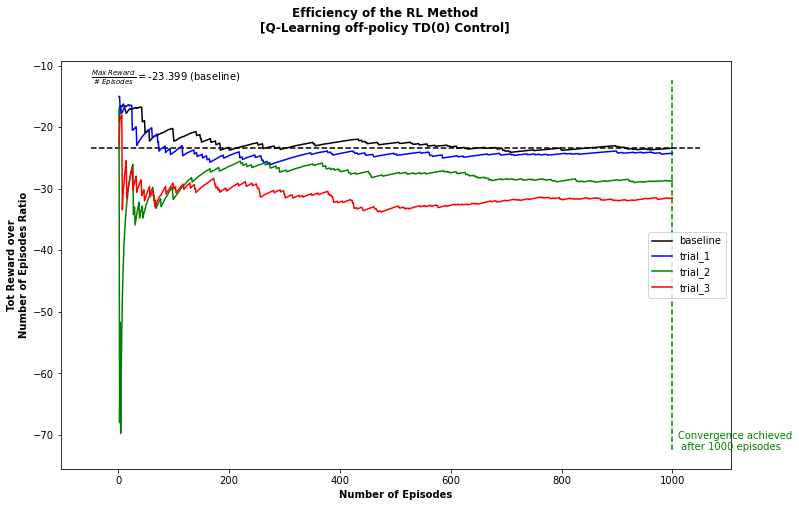

In [108]:
title = 'Efficiency of the RL Method\n[Q-Learning off-policy TD(0) Control]'
plotutls.plot_learning_curve(rewards_per_trial_QL, title=title)

In [43]:
RL_trials

{'baseline': {'epsilon': 0.1, 'step_size': 0.5, 'discount': 1},
 'trial_1': {'epsilon': 0.1, 'step_size': 0.4, 'discount': 1},
 'trial_2': {'epsilon': 0.13, 'step_size': 0.4, 'discount': 1},
 'trial_3': {'epsilon': 0.16, 'step_size': 0.4, 'discount': 1}}

### 2d. On-Policy Expected SARSA

In [109]:
# Define Number of Episodes
n_episodes = 1000

# e-greedy parameters to investigate
print('Determine the epsilon parameters for the epsilon-greedy policy...\n')
epsilons = np.array([0.1, 0.13, 0.16])
print('epsilons: '.format(epsilons), '\n')

# various step-sizes (alpha) to try
print('Determine the step-sizes parameters (alphas) for the TD(0)...\n')
step_sizes = np.array([0.4])
print('step_sizes: {}'.format(step_sizes), '\n')

# Fixed discount
discount_fixed = 1

# Create a mesh-grid of trials
print('Create a dictionary of the RL-models of interest...\n')
epsilons, step_sizes = np.meshgrid(epsilons, step_sizes)
epsilons = epsilons.flatten()
step_sizes = step_sizes.flatten()

# Create a dictionary of the RL-trials of interest
RL_trials = {"baseline":
             {'epsilon': 0.1,
              'step_size': 0.5, 'discount': 1}}

for n, trial in enumerate(list(zip(epsilons, step_sizes))):
    key = 'trial_' + str(n+1)
    RL_trials[key] = {'epsilon': trial[0], 
                      'step_size': trial[1], 'discount': discount_fixed}
print('Number of RL-models to try: {}\n'.format(len(RL_trials)))

print('Let all RL-models to be trained for {0:,} episodes...\n'.format(int(n_episodes)))

rewards_per_trial_ExpSARSA = OrderedDict((label, np.array([])) for label, _ in RL_trials.items())
q_values_per_trial_ExpSARSA = OrderedDict((label, np.array([])) for label, _ in RL_trials.items())

for trial, params_dict in RL_trials.items():
    
    # Read out parameters from "params_dict"
    epsilon = params_dict['epsilon']
    step_size = params_dict['step_size']
    discount = params_dict['discount']
    
    # Apply SARSA [on-policy TD(0) Control]
    q_values, tot_rewards = TD0.expected_sarsa_on_policy(env, 
                                                         n_episodes=n_episodes, 
                                                         step_size=step_size, discount=discount, epsilon=epsilon)
    
    # Update "rewards_per_trial" and "q_values_per_trial" OrderedDicts
    rewards_per_trial_ExpSARSA[trial] = tot_rewards
    q_values_per_trial_ExpSARSA[trial] = q_values

Determine the epsilon parameters for the epsilon-greedy policy...

epsilons:  

Determine the step-sizes parameters (alphas) for the TD(0)...

step_sizes: [0.4] 

Create a dictionary of the RL-models of interest...

Number of RL-models to try: 4

Let all RL-models to be trained for 1,000 episodes...



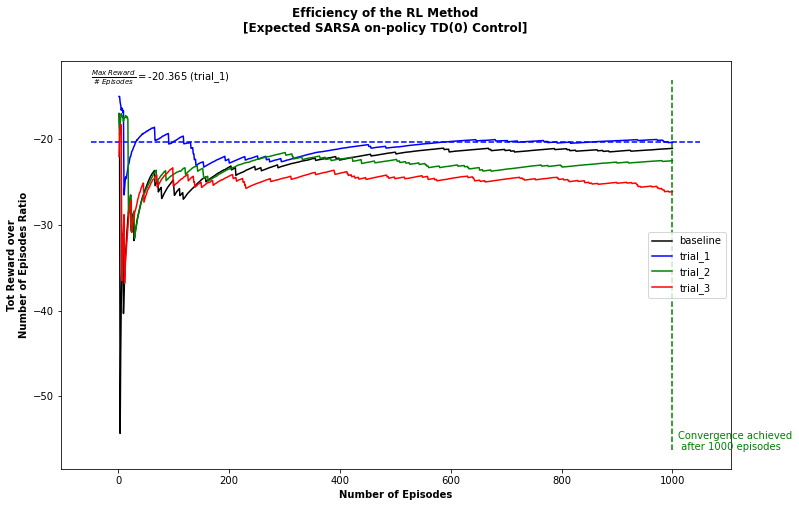

In [110]:
title = 'Efficiency of the RL Method\n[Expected SARSA on-policy TD(0) Control]'
plotutls.plot_learning_curve(rewards_per_trial_ExpSARSA, title=title)

In [46]:
RL_trials

{'baseline': {'epsilon': 0.1, 'step_size': 0.5, 'discount': 1},
 'trial_1': {'epsilon': 0.1, 'step_size': 0.4, 'discount': 1},
 'trial_2': {'epsilon': 0.13, 'step_size': 0.4, 'discount': 1},
 'trial_3': {'epsilon': 0.16, 'step_size': 0.4, 'discount': 1}}

## 3. Double Learning: a method to mitigate maximization bias

In [47]:
%run ./TD0_Utils.py 

In [48]:
TD0 = TemporalDifferenceUtils(env)

### 3b. Double Q-Learning: Off-Policy TD(0) Control

In [111]:
# Define Number of Episodes
n_episodes = 1000

# e-greedy parameters to investigate
print('Determine the epsilon parameters for the epsilon-greedy policy...\n')
epsilons = np.array([0.1, 0.13, 0.16])
print('epsilons: '.format(epsilons), '\n')

# various step-sizes (alpha) to try
print('Determine the step-sizes parameters (alphas) for the TD(0)...\n')
step_sizes = np.array([0.4])
print('step_sizes: {}'.format(step_sizes), '\n')

# Fixed discount
discount_fixed = 1

# Create a mesh-grid of trials
print('Create a dictionary of the RL-models of interest...\n')
epsilons, step_sizes = np.meshgrid(epsilons, step_sizes)
epsilons = epsilons.flatten()
step_sizes = step_sizes.flatten()

# Create a dictionary of the RL-trials of interest
RL_trials = {"baseline":
             {'epsilon': 0.1,
              'step_size': 0.5, 'discount': 1}}

for n, trial in enumerate(list(zip(epsilons, step_sizes))):
    key = 'trial_' + str(n+1)
    RL_trials[key] = {'epsilon': trial[0], 
                      'step_size': trial[1], 'discount': discount_fixed}
print('Number of RL-models to try: {}\n'.format(len(RL_trials)))

print('Let all RL-models to be trained for {0:,} episodes...\n'.format(int(n_episodes)))

rewards_per_trial_DQL = OrderedDict((label, np.array([])) for label, _ in RL_trials.items())
q_values_per_trial_DQL = OrderedDict((label, np.array([])) for label, _ in RL_trials.items())

for trial, params_dict in RL_trials.items():
    
    # Read out parameters from "params_dict"
    epsilon = params_dict['epsilon']
    step_size = params_dict['step_size']
    discount = params_dict['discount']
    
    # Apply SARSA [on-policy TD(0) Control]
    q_values, tot_rewards = TD0.double_q_learning(env, 
                                                  n_episodes=n_episodes, 
                                                  step_size=step_size, discount=discount, epsilon=epsilon)
    
    # Update "rewards_per_trial" and "q_values_per_trial" OrderedDicts
    rewards_per_trial_DQL[trial] = tot_rewards
    q_values_per_trial_DQL[trial] = q_values

Determine the epsilon parameters for the epsilon-greedy policy...

epsilons:  

Determine the step-sizes parameters (alphas) for the TD(0)...

step_sizes: [0.4] 

Create a dictionary of the RL-models of interest...

Number of RL-models to try: 4

Let all RL-models to be trained for 1,000 episodes...



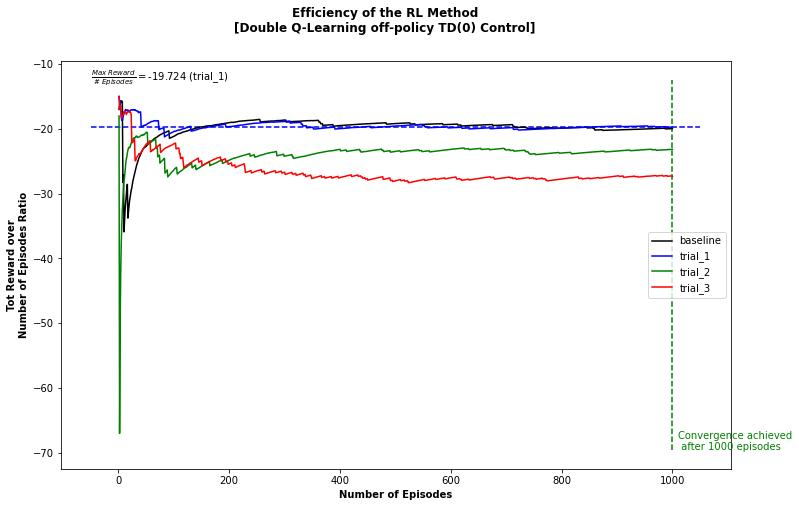

In [112]:
title = 'Efficiency of the RL Method\n[Double Q-Learning off-policy TD(0) Control]'
plotutls.plot_learning_curve(rewards_per_trial_DQL, title=title)

In [113]:
RL_trials

{'baseline': {'epsilon': 0.1, 'step_size': 0.5, 'discount': 1},
 'trial_1': {'epsilon': 0.1, 'step_size': 0.4, 'discount': 1},
 'trial_2': {'epsilon': 0.13, 'step_size': 0.4, 'discount': 1},
 'trial_3': {'epsilon': 0.16, 'step_size': 0.4, 'discount': 1}}

## 4. Comparison of SARSA, Q-Learning and Expected SARSA best models

After an initial transient, **Q-learning** learns values for the *optimal policy*, the ones that travels right along the edge of the cliff. Unfortunately, this results the traveller fall-off the cliff ocasionally, because of the $\varepsilon$-greedy selection. **SARSA**, on the other hand, takes the action selection into account and learns the longer but *safer path*, through the *upper part* of the *grid*. Although, Q-learning actually learns the values of the optimal policy, its online performance is worse than that of SARSA, which learns the roundabout policy.

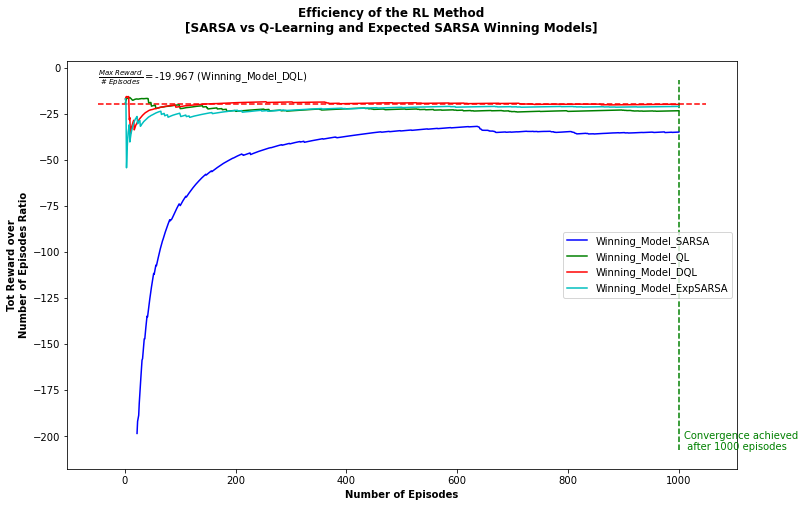

In [129]:
winning_trial = 'baseline'
rewards_per_trial_best_models = OrderedDict([('Winning_Model_SARSA', np.array([])), 
                                             ('Winning_Model_QL', np.array([])),
                                             ('Winning_Model_DQL', np.array([])),
                                             ('Winning_Model_ExpSARSA', np.array([]))])

rewards_per_trial_best_models['Winning_Model_SARSA'] = rewards_per_trial_SARSA[winning_trial]
rewards_per_trial_best_models['Winning_Model_QL'] = rewards_per_trial_QL[winning_trial]
rewards_per_trial_best_models['Winning_Model_DQL'] = rewards_per_trial_DQL[winning_trial]
rewards_per_trial_best_models['Winning_Model_ExpSARSA'] = rewards_per_trial_ExpSARSA[winning_trial] 

title = 'Efficiency of the RL Method\n[SARSA vs Q-Learning and Expected SARSA Winning Models]'
plotutls.plot_learning_curve(rewards_per_trial_best_models, title=title, lower_reward_ratio=-200)

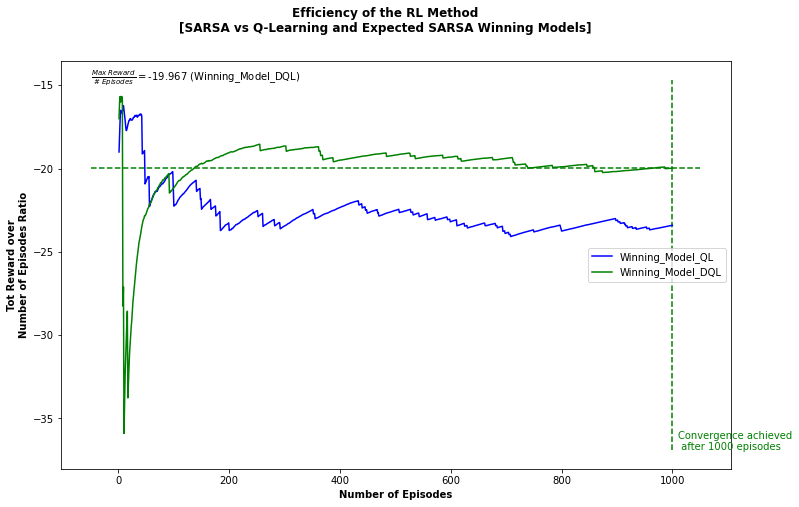

In [130]:
winning_trial = 'baseline'
rewards_per_trial_best_models = OrderedDict([#('Winning_Model_SARSA', np.array([])), 
                                             ('Winning_Model_QL', np.array([])),
                                             ('Winning_Model_DQL', np.array([]))])
#                                              ('Winning_Model_ExpSARSA', np.array([]))])

# rewards_per_trial_best_models['Winning_Model_SARSA'] = rewards_per_trial_SARSA[winning_trial]
rewards_per_trial_best_models['Winning_Model_QL'] = rewards_per_trial_QL[winning_trial]
rewards_per_trial_best_models['Winning_Model_DQL'] = rewards_per_trial_DQL[winning_trial]
# rewards_per_trial_best_models['Winning_Model_ExpSARSA'] = rewards_per_trial_ExpSARSA[winning_trial] 

title = 'Efficiency of the RL Method\n[SARSA vs Q-Learning and Expected SARSA Winning Models]'
plotutls.plot_learning_curve(rewards_per_trial_best_models, title=title, lower_reward_ratio=-200)

**Note:** In `"CliffWalking-v0"` environment the traveler can choose one of the below actions as she navigates through the grid:
- "UP":  denoted by 0
- "RIGHT": denoted by 1
- "DOWN": denoted by 2
- "LEFT": denoted by 3

In [54]:
# print optimal policy
def print_optimal_policy(q_values, grid_height=4, grid_width=12):
    # Define a helper dictionary of actions
    actions_dict = {}
    actions = ['UP', 'RIGHT', 'DOWN', 'LEFT']
    for k, v in zip(actions, range(0, len(actions))):
        actions_dict[k] = v
        
    # Define the position of target dstination
    GOAL = [3, 11]
        
    # Reshape the "q_values" table to follow grid-world dimensionality
    q_values = q_values.reshape((grid_height, grid_width, len(actions)))
        
    optimal_policy = []
    for i in range(0, grid_height):
        optimal_policy.append([])
        for j in range(0, grid_width):
            if [i, j] == GOAL:
                optimal_policy[-1].append('G')
                continue
            bestAction = np.argmax(q_values[i, j, :])
            if bestAction == actions_dict['UP']:
                optimal_policy[-1].append('\U00002191')
            elif bestAction == actions_dict['RIGHT']:
                optimal_policy[-1].append('\U00002192')
            elif bestAction == actions_dict['DOWN']:
                optimal_policy[-1].append('\U00002193')
            elif bestAction == actions_dict['LEFT']:
                optimal_policy[-1].append('\U00002190')
    for row in optimal_policy:
        print(*row)


### **Learned Policies**

**SARSA on-Policy TD(0) Control:**

Winning trial:

In [118]:
winning_trial = 'baseline'

In [119]:
print_optimal_policy(q_values_per_trial_SARSA[winning_trial], grid_height=4, grid_width=12)

→ → → → → → → → → → → ↓
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ G


**Q-Learning off-Policy TD(0) Control:** 

In [120]:
print_optimal_policy(q_values_per_trial_QL[winning_trial], grid_height=4, grid_width=12)

→ → → → → → → → → → → ↓
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ G


**Double Q-Learning off-Policy TD(0) Control:** 

In [123]:
print_optimal_policy(q_values_per_trial_DQL[winning_trial], grid_height=4, grid_width=12)

→ → → → → → → → → → → ↓
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ G


**Expected SARSA on-Policy TD(0) Control:**

In [124]:
print_optimal_policy(q_values_per_trial_ExpSARSA[winning_trial], grid_height=4, grid_width=12)

→ → → → → → → → → → → ↓
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ G
